<a href="https://colab.research.google.com/github/nvg14/knn/blob/main/dry_beans_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures

In [3]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/Dry_Bean_Dataset.xlsx")

In [4]:
features = df.drop(columns=['Class']).columns
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify = df['Class'])

In [5]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [6]:
X_train = train_df[features]
y_train = train_df['Class']

X_test = test_df[features]
y_test = test_df['Class']

In [9]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity']
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)

<ipython-input-9-812b75851062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)
<ipython-input-9-812b75851062>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)


In [10]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

In [11]:
nbrs = []
cv_scores = []
for k in range(1,40):
   nbrs.append(k)
   knn = KNeighborsClassifier(n_neighbors = k)
   scores = cross_val_score(knn,X_train_scaled,y_train,cv=10, scoring = 'accuracy')
   cv_scores.append(scores.mean())
cv_scores

[0.9052129275123113,
 0.9031905304670167,
 0.9178083060501109,
 0.9179003023702581,
 0.9223127435196709,
 0.9234162765842309,
 0.9236006074462905,
 0.9247959677201146,
 0.9257150008117323,
 0.9248873721521729,
 0.9243361552302615,
 0.9246124824124683,
 0.9248883022620271,
 0.9247961368309975,
 0.9251636147789384,
 0.9239681699496727,
 0.9252558647654094,
 0.9263588904973213,
 0.9258996698955573,
 0.9261752360787922,
 0.9258075044645274,
 0.9266348794577629,
 0.9260832397586449,
 0.9260831552032037,
 0.9258992471183506,
 0.9255314309486445,
 0.9250719566805564,
 0.9251639530007036,
 0.9260833243140864,
 0.9256233427133503,
 0.9252555265436442,
 0.9249802140267331,
 0.9255317691704097,
 0.9249803831376158,
 0.924520739758645,
 0.9250722949023216,
 0.9252559493208509,
 0.9242447507982033,
 0.9245206552032037]

In [12]:
MSE = [1-x for x in cv_scores]

In [13]:
optimal_k = nbrs[MSE.index(min(MSE))]

print('The optimal value of K (neighbors) is %d ' %optimal_k)

The optimal value of K (neighbors) is 22 


Text(0, 0.5, 'Mean Error')

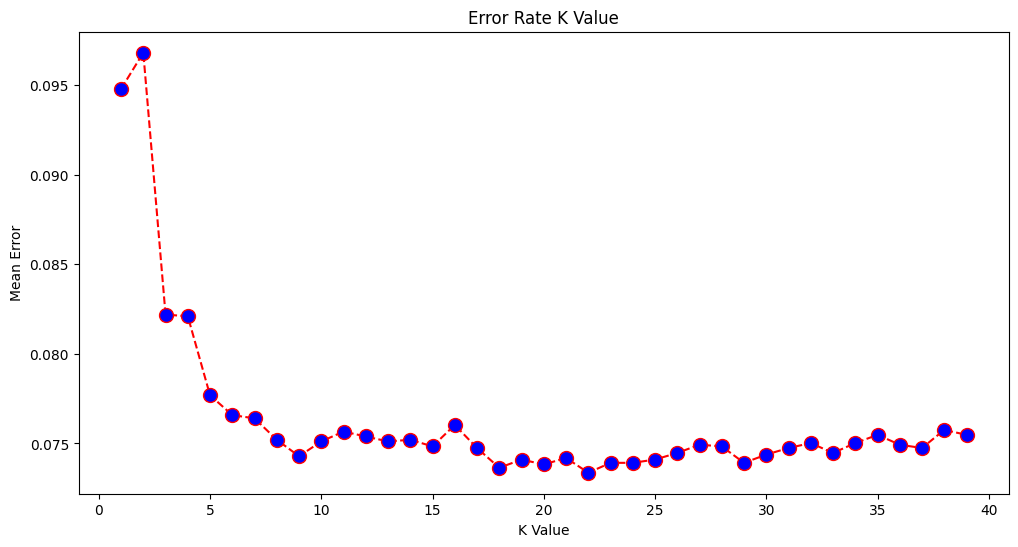

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), MSE, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [15]:
knn = KNeighborsClassifier(n_neighbors = 22)

knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=22)

In [16]:
from sklearn import metrics
print("Train F1_Score: ", metrics.f1_score(y_train, knn.predict(X_train_scaled), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, knn.predict(X_test_scaled), average='micro'))

Train F1_Score:  0.9324262204652018
Test F1_Score:  0.9192067572530298


              precision    recall  f1-score   support

    BARBUNYA       0.97      0.87      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.96      0.94       326
    DERMASON       0.91      0.91      0.91       709
       HOROZ       0.96      0.95      0.95       386
       SEKER       0.94      0.94      0.94       406
        SIRA       0.85      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



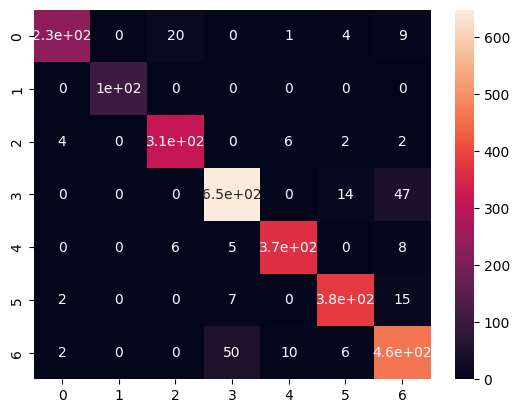

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict))